## Import modules

In [ ]:
# Dataframes
import pandas as pd
import geopandas as gpd

# Data visualisation
import matplotlib.pyplot as plt
import folium

pd.set_option('display.max_columns', None) #-- to show all columns in a dataframe. To reset: pd.reset_option(“max_columns”)



# (Geo-)DataFrames - Tabular data in python; An introduction

__DataFrames:__

- What They Are: Tables of data.
- Made Up Of: Rows and columns (imagine a grid). Two main data structures - Series (1D labeled array) and DataFrame (2D labeled table).



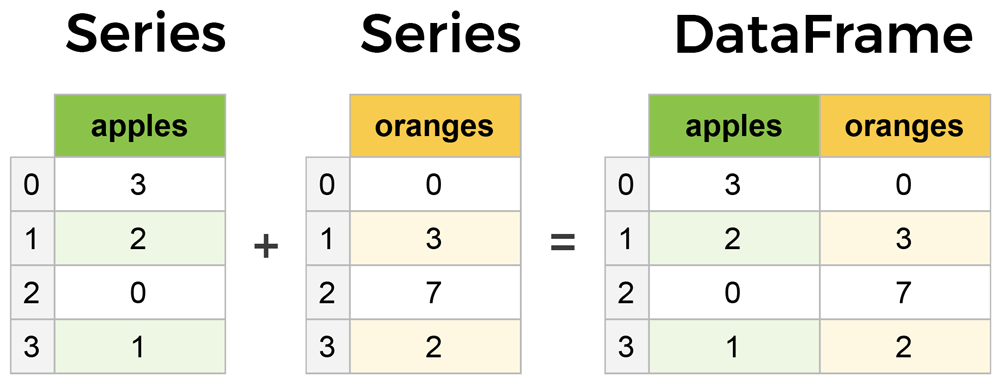

__Pandas:__

- Use: Deals with regular tables of data (think Excel spreadsheets).
- Main Things: Understands rows and columns of information.
- Helps With: Sorting, filtering, and analyzing data easily.
- Pandas Ecosystem:

        NumPy:

        - Role: Provides support for large, multi-dimensional arrays and matrices.
        - Use in Pandas: Pandas is built on top of NumPy, leveraging its numerical capabilities for efficient data manipulation.

        Matplotlib:

        - Role: A 2D plotting library for creating visualizations.
        - Use in Pandas: Pandas uses Matplotlib for basic plotting and visualization of data.

        SciPy:

        - Role: A library for scientific and technical computing.
        - Use in Pandas: Pandas uses SciPy for statistical and scientific computations.


__Geopandas:__

- Pandas' Buddy: Works with data like pandas but adds a twist for maps.
- Special Power: Handles maps and location data (like plotting points on a map).
- Good For: Making maps, analyzing places, and playing with geography in Python.
- Geopandas Ecosystem:

        Shapely:

        - Role: Handles geometric operations (points, lines, polygons) for spatial data.
        - Use in Geopandas: Geopandas relies on Shapely for geometric manipulations.

        Fiona:

        - Role: Reads and writes spatial data files.
        - Use in Geopandas: Geopandas uses Fiona to read and write geographic data files.

        PyProj:

        - Role: Performs cartographic projections and transformations.
        - Use in Geopandas: Geopandas uses PyProj for coordinate transformations.
  
        Matplotlib:

        - Role: A 2D plotting library for creating visualizations (this time, maps).
        - Use in GeoPandas: GeoPandas uses Matplotlib for basic plotting and visualization of data.








### So what changes with a GeoDataframe? We add geometries, and support for their operations.

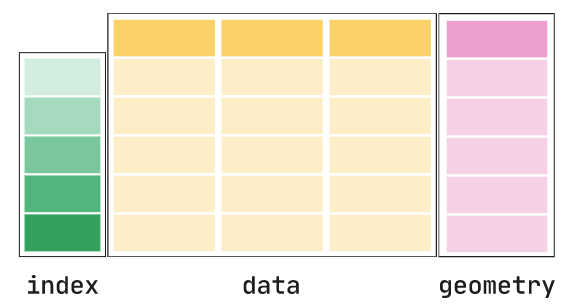

## Part 1: Pandas and GeoPandas basics.

### 1.1: Read a file into a pandas DataFrame and explore

Pandas is versatile and can read a variety of formats, such as csv, json, xml, spss etc. 

The commands are read_'format', e.g. read_csv, read_json, read_excel, read_xml, read_html, read_spss etc.

More: https://pandas.pydata.org/docs/reference/io.html

In [ ]:
# Read in csv: 
admin_csv = xx.xxx('../data/raw_data/gadm41_NLD_2_no_geom.csv')

First rows

In [ ]:
admin_csv.xxx()

Last rows

In [ ]:
admin_csv.xxx()

Shape of Dataframe

In [ ]:
admin_csv.xxx

### 1.2: GeoPandas and loading directly into GeoDataFrame.

In [ ]:
admin_geom = xxx.xxx('../data/raw_data/gadm41_NLD_2_geom.json')
admin_geom.head()

### 1.3: Merging Dataframes

#### We can use .merge() to combine two DataFrames. The 'how' parameter specifies the type of merge:
- 'inner' (default): Keeps only the common values in both DataFrames
- 'left': Keeps all values from the left DataFrame and only common values from the right DataFrame
- 'right': Keeps all values from the right DataFrame and only common values from the left DataFrame
- 'outer': Keeps all values from both DataFrames, filling missing values with NaN

In this case, all result in the same. 

![joins](../data/types-of-joins.png)

want to know more: https://pandas.pydata.org/docs/user_guide/merging.html

In [ ]:
admin = admin_geom.xxx(admin_csv, on='xxx')
admin.head()

In [ ]:
# Get a quick overview of dataframe structure with .shape
admin.shape

#### In case you need to catch up:

In [ ]:
admin = gpd.read_file('../data/raw_data/gadm41_NLD_2.json')

## Part 2: Filter rows by index / attribute.

There are two essential functions to filter rows: __loc and iloc__

With loc and iloc you can do practically any data selection operation on DataFrames you can think of. 

- loc gets rows (and/or columns) with particular labels - label-based.

- iloc gets rows (and/or columns) at integer locations - index based.


### 2.1: Filtering by index

Single column/row

In [ ]:
admin.xxx.xxx[x]

Single column/many rows

In [ ]:
admin.xxx.xxx[xx:xx]

Multiple rows, all columns

In [ ]:
admin.xx[xx:xx]

Watch out, index starts at 0!

### 2.2: Filtering by (column) attributes

In [ ]:
# Get unique values of a column
admin.NAME_1.xxx()

Build a boolean (True/False) mask using loc

In [ ]:
# No. 1:
admin.xxx[admin['NAME_1'] == 'xxx']

#### There are to different ways to call columns - df['xxx'] vs df.xxx

In [ ]:
# No. 2:
admin.loc[admin.NAME_1 == 'xxx']

#### Beware when you're trying to call functions after calling columns. And beware of column names that emulate functions (e.g. datetime, a common example)

### 2.3: Split selection into new dataframe

In [ ]:
# Save a new variable to subset the dataframe, e.g. Amsterdam.
xxx = admin.loc[admin.NAME_2 == 'xxx']
print(xxx)
xxx.plot()

## Part 3: Geographic vs Projected Coordinate Reference Systems (CRS)

A coordinate reference system (CRS) is a reference framework that defines the position of features in two- or three-dimensional space, in this case the Earth's surface. They facilitate accurate mapping, navigation, and spatial analysis.

#### Question: How can we find out info about the CRS?

In [ ]:
admin.xxx

In [ ]:
# Let's have a look at the first row
print(admin.NAME_2.iloc[0])
print(admin.geometry[0])

### Creating new columns

In [ ]:
# Create new column with point geometry -> calculate centroid.
admin["centroid"] = admin.geometry.xxx

#### Question: Why do we see this warning? 

Distance calculations in Geographic Coordinate Reference Systems (GCRS) can be potentially inaccurate due to the curvature of the Earth. 

In Geographic CRS', locations are specified in terms of latitude and longitude, which are angular measurements on a spherical or ellipsoidal surface. When calculating distances directly from these coordinates, __without considering the curvature of the Earth, errors can be introduced__.

The Earth is roughly spherical in shape, and as you move away from the equator, the meridians (lines of longitude) converge towards the poles. This means that one degree of longitude covers less ground near the poles than near the equator. Similarly, the distance covered by one degree of latitude remains relatively constant, but the actual distance on the ground varies due to the curvature of the Earth.

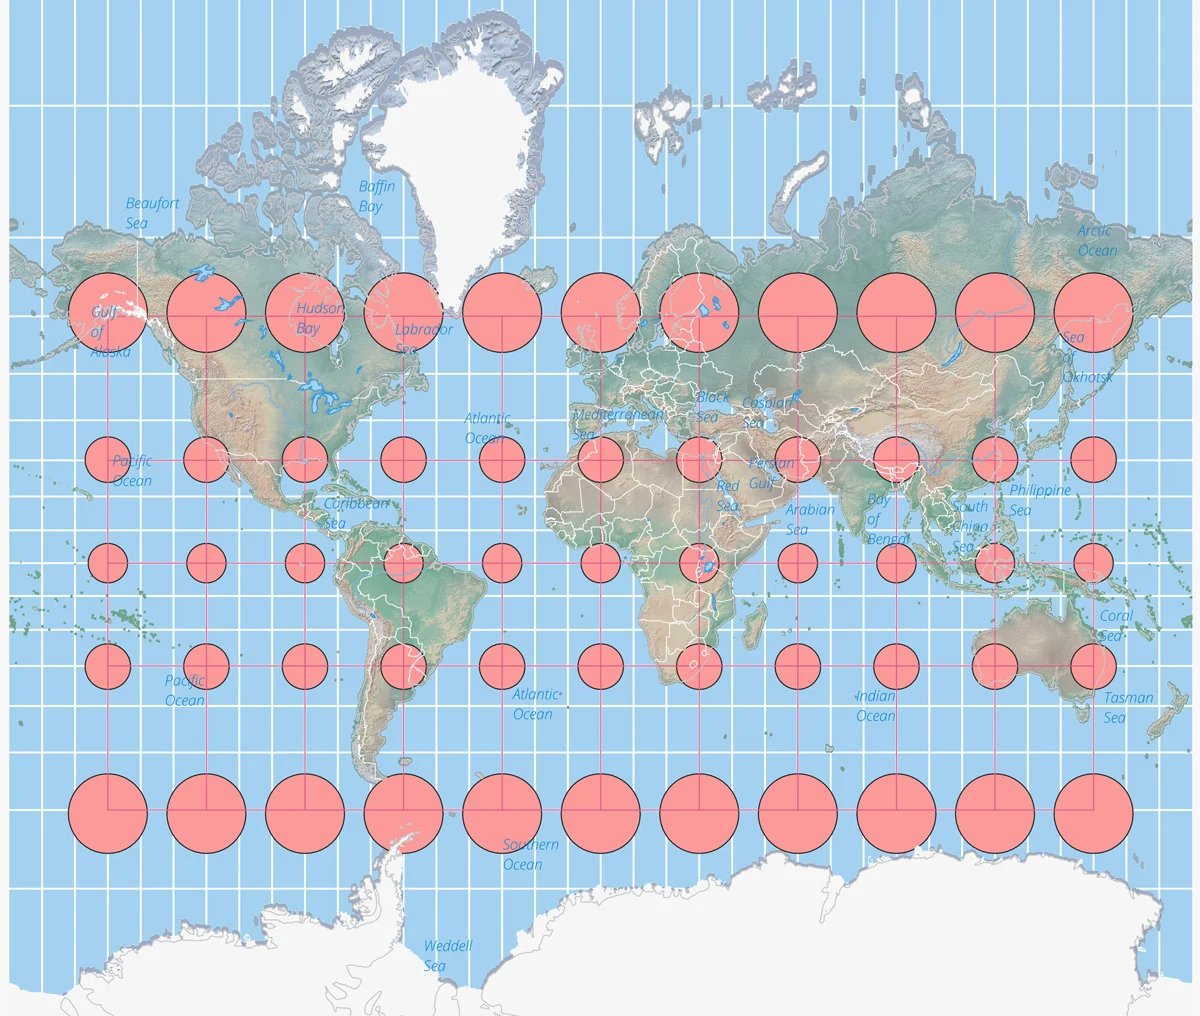

To mitigate these inaccuracies, especially in tasks where precise distance measurements are crucial, __it's common to use Projected Coordinate Reference Systems (PCRS)__ instead of GCRS. PCRS involves a mathematical __transformation of the 3D Earth onto a 2D plane__, allowing for more accurate distance calculations within the chosen projection.

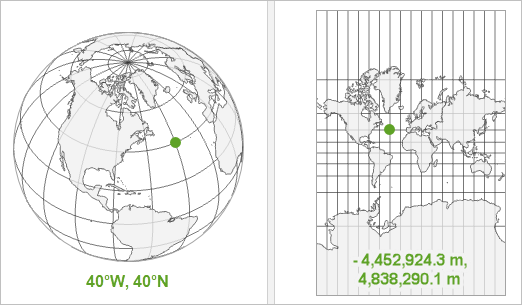


__Geographic vs Projected CRS (GCRS/PCRS); Key Differences:__

- Shape Representation: GCRS represents the Earth as a 3D object, while PCRS represents it as a 2D plane.
- Coordinate Units: GCRS uses angular units (degrees), while PCRS uses linear units (e.g., meters).
- Distortion: PCRS may introduce distortions, especially as you move away from the center of the projection, whereas GCRS maintains the natural shape of the Earth.

In summary, GCRS is based on latitude and longitude on a curved surface, while PCRS involves the flattening of the Earth's surface for practical mapping purposes. Each has its own advantages and is used for different applications based on the requirements of the task at hand.




####  Question: What CRS do we most commonly use in the Netherlands?


Hint: 
The central point of the system is the spire of the Onze Lieve Vrouwetoren ('Lange Jan') in Amersfoort (below).

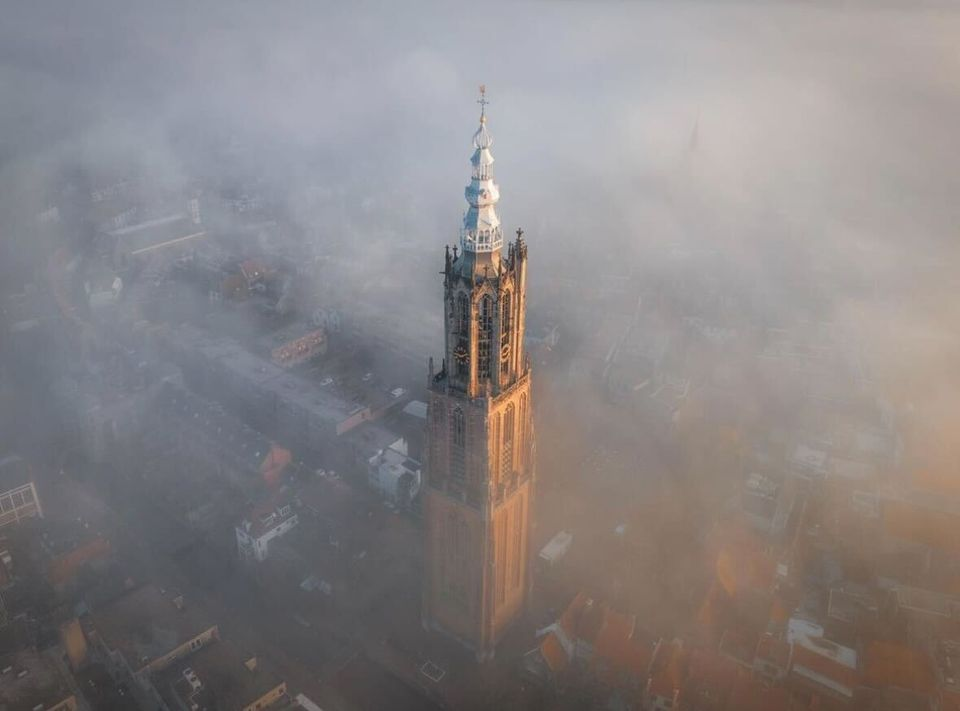

This point has the coordinates __x  = 155,000 m, y  = 463,000 m.__

These values have been chosen such that for every point on land throughout the European Netherlands, the x -coordinate is between 0 and 280 km and the y -coordinate is between 300 and 625 km. 

So __all coordinates have a positive value__ and __each y -coordinate is greater than the x -coordinate__. 

This means that no confusion can occur between the x and y coordinates if they are not explicitly labeled.

In [ ]:
# In the Netherlands, generally use Amersfoort / RD New (EPSG:28992)
# It's a localized projection designed to minimize distortion within the Netherlands.
admin = admin.xxx(xxx)

In [ ]:
admin.crs

In [ ]:
print(admin.NAME_2.iloc[0])
print(admin.geometry[0])

#### Question: What can we already tell by just looking at the coordinates?

## Part 4: Geographic features

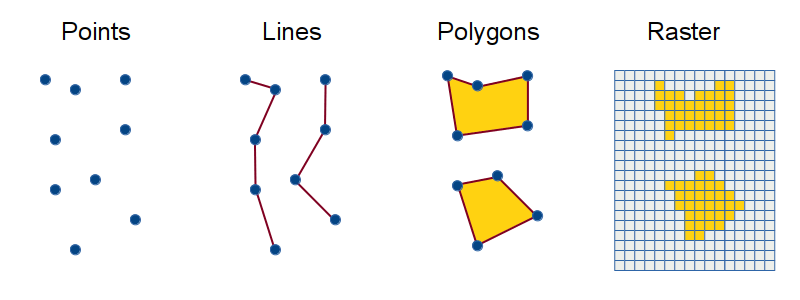

#### Question: What kind of data do we have here?

### 4.1 GeoDataFrames can easily be plotted

Plotting and increasing size of the figure:

In [ ]:
admin.xxx(
    
)

#### We can also plot individual geometries by just calling the geometry:

In [ ]:
admin.geometry[0]

### 4.2: Let's try this centroid thing again, from polygon to point:

#### Question: What was the command again?

In [ ]:
admin["centroid"] = admin.xxx.xxx

In [ ]:
# The difference between Multipolygon and Point
print(f'(Multi-)Polygon: {admin.geometry[0]}')
print('------------------')
print(f'Point: {admin.centroid[0]}')

### 4.3: Plotting two layers on the same map (using ax)

Setting different geometry and plotting on the same map. 

In [ ]:
ax = admin.set_geometry("centroid").plot('NAME_1', 
                                         markersize=5, 
                                         figsize=(10,10),
                                         
                                        )
admin.plot(ax=ax, 
           facecolor="none", 
           edgecolor="k", 
           linewidth=0.2,
);

#### Question 1: Why do the points have different colors?

#### Question 2: How do you think can we add a legend?

## Part 5: (Geo-)DataFrame interactions.
Let's add another dataset

In this case, we have a dataset from __Samenmeten__, an initiative by the Rijksinstituut voor Volksgezondheid en Milieu (RIVM).

The Samenmeten data portal is a central place where you can find and compare sensor data from citizen scientists, (decentralized) governments and other stakeholders - if you have/install a sensor, you can register it here.

![Samenmeten](../data/samenmeten.png)

### 5.1: Reading and interrogating another dataset

#### Question: How do we read new data?

In [ ]:
sensors = xxx.xxx('../data/raw_data/samenmeten.json')
sensors.xxx()

In [ ]:
# Look at datatypes
sensors.dtypes

#### Question: How can we find out how many sensors we have?

In [ ]:
sensors.xxx

#### Question: What crs is the GeoDataFrame in?

In [ ]:
sensors.xxx

#### Question: If we'd like to plot the dataframe, how do we do that? And how do we increase the size?

In [ ]:
sensors.xxx(
    
)

In [ ]:
# Plot sensors - colored by attribute
ax = sensors.plot('xxx', 
                  markersize=3, 
                  figsize=(15,15),
                 )
# Plot polygons without color filling
admin.plot(ax=ax, 
           facecolor="none", 
           edgecolor="k", 
           linewidth=0.2,
);

plt.title("Samenmeten sensors in the Netherlands", fontweight='bold', fontsize=18)

plt.show()

### 5.2: How do we find out how many sensors are in each province? Overlay functions. 



When working with multiple spatial datasets – especially multiple polygon or line datasets – we often wish to create new shapes based on places where those datasets overlap (or don’t overlap). These manipulations are often referred using the language of sets 
- intersections, 
- unions, and 
- differences. 

These types of operations are made available in the GeoPandas library through the `.overlay()` method.

The basic idea is demonstrated by the graphic below but keep in mind that overlays operate at the DataFrame level, not on individual geometries, and the properties from both are retained. In effect, for every shape in the left GeoDataFrame, this operation is executed against every other shape in the right GeoDataFrame:


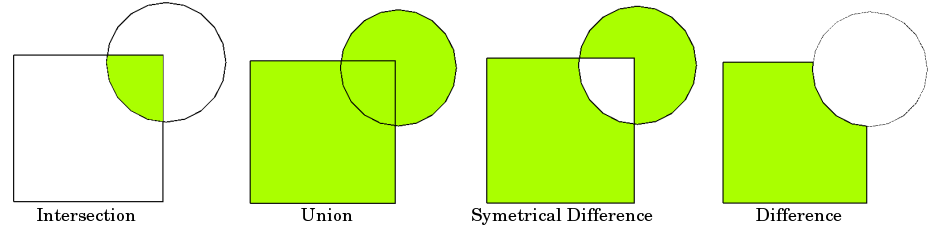

More info: https://geopandas.org/en/stable/docs/user_guide/set_operations.html

Not for today, but you can also use all other standard operations such as `.clip()`, `.buffer()`

#### Question: What method would be most appropriate here?

In [ ]:
intersection = gpd.overlay(xxx, xxx, how='xxx')

In [ ]:
intersection.head()

In [ ]:
intersection.shape

### 5.3: For each sensor, we now added the spatially intersecting columns from our administrative areas.

#### Question: How do we get the count? We first need to aggregate and restructure a bit.

In [ ]:
# There are many potential implementations, this is one of them:
admin_counts = intersection.groupby('NAME_1').size().reset_index(name='sensor_count')
admin_counts

What did we do here:

- `.groupby()`
    - Purpose: This function is used to group rows of a DataFrame based on values in one or more columns.
    - Usage: After grouping, you typically apply an aggregation function (like sum, mean, etc.) to each group.
    
- `.size()`
    - Purpose: After grouping, .size() is often used to calculate the size (count) of each group.
    - Usage: It returns a Series with the group labels as the index and the size of each group as the values.
    
- `.reset_index()`
    - Purpose: After grouping and applying aggregation functions, .reset_index() is used to convert the grouped data back into a regular DataFrame.
    - Usage: It adds a default integer index to the grouped DataFrame and moves the group labels from the index to regular columns.

### 5.4: This isn't very intuitive, so we also want to reorganise the pandas DataFrame

Sorting values:

In [ ]:
admin_counts.xxx(by='xxx', ascending=xxx)

### 5.5: What if we just want to find out the maximum, or the minimum?

In [ ]:
# Query columns for max
admin_counts[admin_counts['sensor_count'] == admin_counts['sensor_count'].xxx()]


In [ ]:
# Query columns for min
admin_counts[admin_counts['sensor_count'] == admin_counts['sensor_count'].xxx()]


In [ ]:
# Query columns for mean
admin_counts['sensor_count'].xxx()

What if we want easy summary statistics, or a 'description' of our column? 

In [ ]:
admin_counts['sensor_count'].xxx()

Also works for a full dataframe (all numerical columns)

### 5.6: Bar plots

#### Vertical barplot

In [ ]:
plt.bar(admin_counts['NAME_1'], admin_counts['sensor_count'])

# plt.xticks(rotation=90)

# plt.xlabel("Province")
# plt.ylabel("No of sensors")
# plt.title("Number of sensors by province", fontweight='bold')



plt.show()

#### Horizontal - the missing h

### 5.6: Bringing together two dataframes

#### Now we have a pandas DataFrame with the number of sensors per municipality. What if we want to visualise this on a map? How do we add the geographic information? What function can we use?

#### Question: What column do they have in common?

In [ ]:
# Merge the DataFrames
merged_df = pd.merge(admin, admin_counts, on='xxx')

In [ ]:
merged_df.head()

In [ ]:
merged_df.plot('xxx',
               figsize=(10,10),
               legend=True,
               scheme='natural_breaks',
               )

plt.title("Number of sensors by province", fontweight='bold')

#plt.savefig('../results/figures/Overview_samenmeten_sensors.png', dpi=300, bbox_inches='tight')

#### Question: What new element did we use?

`scheme`; Using 'mapclassify', part of Python Spatial Analysis Library (PySAL). 

Other options: 
- "equal_interval": mapclassify.EqualInterval,
- "fisher_jenks": mapclassify.FisherJenks,
- "jenks_caspall": mapclassify.JenksCaspall,
- "jenks_caspall_forced": mapclassify.JenksCaspallForced,
- "maximum_breaks": mapclassify.MaximumBreaks,
- "quantiles": mapclassify.Quantiles,

and: `plt.savefig()`

More: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html 

### JupyterLab, (Geo-)Pandas and co. -> your one stop shop for geospatial analysis. 

We hope you've seen that:
- You can have an entire analysis flow within JupyterLab, including documentation.
- GeoPandas and related libraries can do (almost) anything you can do within QGIS/ArcGIS, and more.
- By using Jupyter/code, your analysis easily repeated (by you), reproduced (by others) and expanded (by you and others).

## Part 6: Time for you to shine

### We now know that Zuid-Holland has got the most sensors. But how are sensors distributed among the __Buurten__ (Neighbourhoods) within Zuid-Holland?

This is for you to find out: 

### Your task:

- Import and answer a few questions related to a new dataset of buurten
- Find a way to count the sensors per buurt
- Make a graph and basic map of the sensor distribution.
- BONUS: Make an interactive map.


### Materials:

Data:
- Buurten dataset for Zuid-Holland (../data/raw_data/wijkenbuurten_2022_ZH_exercise.json)
    
    
Source of Wijk/Buurt: https://www.cbs.nl/nl-nl/dossier/nederland-regionaal/geografische-data/wijk-en-buurtkaart-2022

### Task 1: Load new dataset and answer the following questions:

#### How many columns does the DataFrame have? `Answer:`
#### How many 'Buurten' are there in Zuid-Holland? `Answer:`

#### What is the name of the buurt in row 4 and how many people live there?`Answer:`. 

#### What are the names of the last 10 Buurten in the DataFrame?

#### Which Buurten are in rows 6 (`Answer: `) and rows 234-236 (`Answer: `)

#### How many Buurten are in Leiden? `Answer:`

### Task 2: Plot the dataframe:

- give the plot a size of 10,10
- set the color by municipality
- use a custom colormap, e.g. 'viridis' (or any found here: https://matplotlib.org/stable/users/explain/colors/colormaps.html)
- change the color of the outlines to white
- give the plot a title
- save the plot to results/figures/

### Task 3: Let's look at the distribution of sensors in Zuid-Holland:

- Which buurt has got the most sensors? `Answer:`
- What is the average no. of sensors per buurt? `Answer:`

There are a few steps involved in this? Can you remember what to do?


### Task 4: Let's filter and look specifically at Rotterdam. 

#### Question: What is the buurt with the most sensors in Rotterdam? `Answer:`

#### Task 5: Make a basic bar plot showing the buurten and number of sensors

### Task 6: Make a basic map showing the numbers of sensors per buurt in Rotterdam. 

- give the map a custom size (make sure it fits the extent nicely)
- use a scheme of your choice
- add a legend
- add a title
- remove unneccessary elements (ticks, grid)
- save the plot to results/figures (as png/jpg)

This time, try and make the map prettier by playing around with:
- plot(
    - figsize
    - edgecolor
    - scheme
    - legend
    - k
    - )

- plt.title()
- plt.xticks()
- plt.yticks()


- plt.gca() # get current axis
- ax.grid()
- ax.set_frame_on()

- plt.savefig()



more info and fun customization: https://geopandas.org/en/stable/docs/user_guide/mapping.html

#### Bonus question: Why do we not see all of the Buurten, and how do you make them visible?

### Task 6; Bonus: Making maps pretty & interactive


As you saw, there are many parts of matplotlib you can customize. But, ultimately __you'll create a static map__. This isn't very engaging.


Instead, why not create an __interactive map?__

Luckily, GeoPandas comes with the _folium_ library already integrated. 

All you need to do is call ```gdf.explore()```. Try it, and make a beautiful interactive map.

A few hints of functions:

- column
- tooltip
- scheme
- k
- tiles
- cmap

More info: https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.explore.html

__Bonus bonus:__ Can you figure out how to add multiple layers to a interactive folium map?

In [ ]:
# The basics
m = rdam.explore()

m